# P1W2D3AM - Model Improvement

> **For simplicity only, in this notebook there are no handling outliers and handling missing values. The purpose of this notebook is just to demonstrate how to use Model Improvement/Hyperparameter Tuning.**

## Import Libraries & Data Loading

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay

In [2]:
# Data Loading

df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w2/P1W2D3AM%20-%20Model%20Improvement%20-%20Iklan_sosmed.csv')
df.head()

,UserID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,Laki,19,19000,0
1,15810944,Laki,35,20000,0
2,15668575,Perempuan,26,43000,0
3,15603246,Perempuan,27,57000,0
4,15804002,Laki,19,76000,0


## Exploratory Data Analysis (EDA)

In [3]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (400, 5)

Col :  UserID
Length Unique Value :  400

Col :  Kelamin
Length Unique Value :  2

Col :  Usia
Length Unique Value :  43

Col :  EstimasiGaji
Length Unique Value :  117

Col :  Beli
Length Unique Value :  2



Since the number of unique value of column `User ID` is equal to the length of dataset, we can remove this feature. Also, it seems that we can't reduce the cardinality of this column  because there is no information that can be used from this column or from other columns.

## Data Preprocessing

In [4]:
# Split between `X` (Features) and `y` (Target)

X = df.drop('Beli', axis=1)
y = df['Beli']
X.head()

,UserID,Kelamin,Usia,EstimasiGaji
0,15624510,Laki,19,19000
1,15810944,Laki,35,20000
2,15668575,Perempuan,26,43000
3,15603246,Perempuan,27,57000
4,15804002,Laki,19,76000


0    257
1    143
Name: Beli, dtype: int64



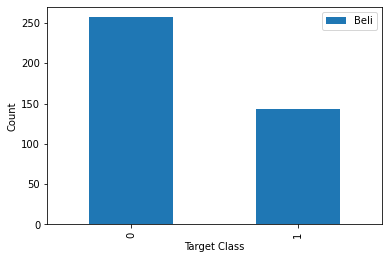

In [5]:
# Check Target Class

print(y.value_counts())
print('')

y.value_counts().plot.bar(xlabel='Target Class', ylabel='Count', legend=True)

The dataset contains **64.25 % of class `0`** and **35.75 % of class `1`**. It's still classified as balanced dataset although the composition tends to class `0`.

In [6]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=8)

print('Size of Train-Set : ', X_train.shape)
print('Size of Test-Set  : ', X_test.shape)

Size of Train-Set :  (280, 4)
Size of Test-Set  :  (120, 4)


In [7]:
# Drop column `User ID`

X_train = X_train.drop('UserID', axis=1)
X_test = X_test.drop('UserID', axis=1)
X_train

,Kelamin,Usia,EstimasiGaji
71,Perempuan,24,27000
11,Perempuan,26,52000
248,Laki,41,52000
241,Laki,38,59000
399,Perempuan,49,36000
...,...,...,...
368,Laki,38,71000
315,Perempuan,39,75000
99,Perempuan,28,37000
363,Perempuan,42,79000


In [8]:
# Split between Numerical Columns and Categorical Columns

X_train_num = X_train[['Usia', 'EstimasiGaji']]
X_test_num = X_test[['Usia', 'EstimasiGaji']]

X_train_cat = X_train[['Kelamin']]
X_test_cat = X_test[['Kelamin']]

In [9]:
# Feature Scaling & Feature Encoding

minmax = MinMaxScaler()
ohe = OneHotEncoder()

minmax.fit(X_train_num)
ohe.fit(X_train_cat)

X_train_num = minmax.transform(X_train_num)
X_test_num = minmax.transform(X_test_num)

X_train_cat = ohe.transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

In [10]:
# Merge Numerical Columns and Categorical Columns

X_train_final = np.concatenate([X_train_num, X_train_cat.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat.toarray()], axis=1)
X_train_final

array([[0.14285714, 0.08888889, 0.        , 1.        ],
       [0.19047619, 0.27407407, 0.        , 1.        ],
       [0.54761905, 0.27407407, 1.        , 0.        ],
       ...,
       [0.23809524, 0.16296296, 0.        , 1.        ],
       [0.57142857, 0.47407407, 0.        , 1.        ],
       [0.30952381, 0.37777778, 1.        , 0.        ]])

## Modeling

Let's create baseline model. Baseline model is a model that is trained using default parameters

In [11]:
# Baseline Model using Random Forest Algorithm

rf = RandomForestClassifier()
rf.fit(X_train_final, y_train)

RandomForestClassifier()

F1 Score - Train Set  :  0.9950248756218906 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       180
           1       0.99      1.00      1.00       100

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280
 

Confusion Matrix      : 


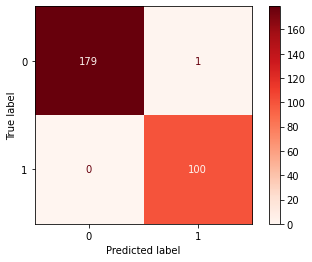

In [12]:
# Check Performance Model against Train-Set

y_pred_train = rf.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

## Cross Validation

Wow ! Our model achieve 99% on F1-Score for the training-set, only one data is predicted wrong. 

* Is this just a coincidence? 
* Is this score valid? 
* How if the model gets data that is easy to learn on the train-set while later on the test-set contain data that is difficult to learn/predict?

To answer these questions, we are gonna use Cross Validation. Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. Cross-validation provides performance measurements such as mean and standard deviation.

* Mean : **how well** the procedure performs on average.
* Standard deviation : **how much** the procedure is expected to vary in practice.

Mean and standard deviation can be used to give a confidence interval on the expected performance on a machine learning procedure in practice.

In [13]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val = cross_val_score(rf, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.85714286 0.80645161 0.84931507]
F1 Score - Mean - Cross Validation :  0.8376365128464113
F1 Score - Std - Cross Validation  :  0.02228141313794953
F1 Score - Range of Test-Set       :  0.8153550997084618 - 0.8599179259843608
CPU times: user 516 ms, sys: 14 ms, total: 530 ms
Wall time: 531 ms


F1 Score - Test Set   :  0.8695652173913043 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        77
           1       0.82      0.93      0.87        43

    accuracy                           0.90       120
   macro avg       0.89      0.91      0.89       120
weighted avg       0.91      0.90      0.90       120
 

Confusion Matrix      : 


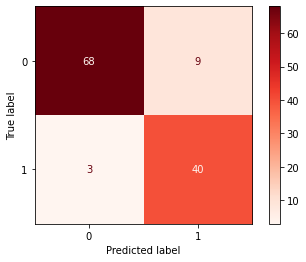

In [14]:
# Check Performance Model against Test-Set

y_pred_test = rf.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_test_final, y_test, cmap='Reds'))

In [15]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
test - accuracy_score,0.900000
test - f1_score,0.869565
test - precision,0.816327
test - recall,0.930233
train - accuracy,0.996429
train - f1_score,0.995025
train - precision,0.990099
train - recall,1.000000


## Model Improvement (Hyperparameter Tuning)

### Manual Search

In [16]:
# Hyperparameter Tuning : Manual Search

%%time

rf_ms_1 = RandomForestClassifier(n_estimators=150,
                                 criterion='entropy',
                                 max_depth=100)
rf_ms_1.fit(X_train_final, y_train)

CPU times: user 351 ms, sys: 4.37 ms, total: 355 ms
Wall time: 376 ms


RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=150)

F1 Score - Train Set  :  0.9950248756218906 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       180
           1       0.99      1.00      1.00       100

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280
 

Confusion Matrix      : 


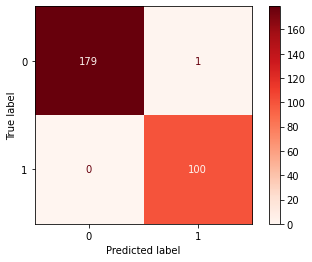

In [17]:
# Check Performance Model against Train-Set

y_pred_train = rf_ms_1.predict(X_train_final)

print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_train_final, y_train, cmap='Reds'))

In [18]:
# Cross Validation using `cross_val_score`

%%time
from sklearn.model_selection import cross_val_score

f1_score_train_cross_val = cross_val_score(rf_ms_1, 
                                           X_train_final, 
                                           y_train, 
                                           cv=3, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.89552239 0.80645161 0.84931507]
F1 Score - Mean - Cross Validation :  0.8504296898186926
F1 Score - Std - Cross Validation  :  0.036371532203710956
F1 Score - Range of Test-Set       :  0.8140581576149817 - 0.8868012220224035
CPU times: user 817 ms, sys: 12.3 ms, total: 830 ms
Wall time: 826 ms


We can see that the mean-accuracy of Cross Validation from model `rf_ms_1` (with new hyperparameter) is higher than model `rf` (using default parameter). 

We also can expect that the performance of test-set using `rf_ms_1` is higher (or at least still in range) than `rf`. Let's prove this!

F1 Score - Test Set   :  0.8695652173913043 

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        77
           1       0.82      0.93      0.87        43

    accuracy                           0.90       120
   macro avg       0.89      0.91      0.89       120
weighted avg       0.91      0.90      0.90       120
 

Confusion Matrix      : 


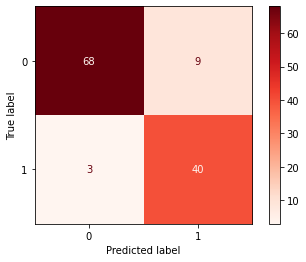

In [19]:
# Check Performance Model against Test-Set

y_pred_test = rf_ms_1.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_ms_1, X_test_final, y_test, cmap='Reds'))

In [20]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Manual Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search
train - precision,0.990099,0.990099
train - recall,1.000000,1.000000
train - accuracy,0.996429,0.996429
train - f1_score,0.995025,0.995025
test - precision,0.816327,0.816327
test - recall,0.930233,0.930233
test - accuracy_score,0.900000,0.900000
test - f1_score,0.869565,0.869565


As we can see from above table, our model performance is improve both in train and test. 

Of course, we can try another hyperparameter manually and do Cross Validation. **But, what if we want to try many configurations of hyperparameters ? Should we input manual the configurations and run manually? NO.** In the following, we will use `RandomSearchCV` and `GridSearchCV` to optimize this process.

### Random Search

In [21]:
# Hyperparameter Tuning : Random Search

from sklearn.model_selection import RandomizedSearchCV

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'criterion': ['entropy', 'gini']}

In [22]:
# Train with Random Search
%%time

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='f1')
rf_randomcv.fit(X_train_final, y_train)

CPU times: user 4.35 s, sys: 414 ms, total: 4.76 s
Wall time: 6min 3s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=46, scoring='f1')

In [23]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'gini'}

In [24]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  0.8842105263157894 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.81      0.98      0.88        43

    accuracy                           0.91       120
   macro avg       0.90      0.92      0.90       120
weighted avg       0.92      0.91      0.91       120
 

Confusion Matrix      : 


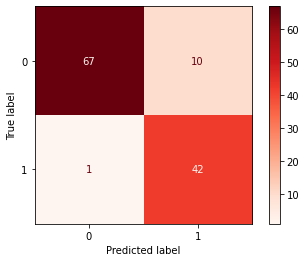

In [25]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test, cmap='Reds'))

In [26]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search,Random Search
train - precision,0.990099,0.990099,0.990099
train - recall,1.000000,1.000000,1.000000
train - accuracy,0.996429,0.996429,0.996429
train - f1_score,0.995025,0.995025,0.995025
test - precision,0.816327,0.816327,0.807692
test - recall,0.930233,0.930233,0.976744
test - accuracy_score,0.900000,0.900000,0.908333
test - f1_score,0.869565,0.869565,0.884211


### Grid Search

In [27]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

# Reuse best hyperparameters from Random Search for efficiency
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, 
                     rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, 
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

param_grid

{'criterion': ['gini'],
 'max_depth': [450],
 'max_features': ['log2'],
 'min_samples_leaf': [8, 10, 12],
 'min_samples_split': [8, 9, 10, 11, 12],
 'n_estimators': [400, 500, 600, 700, 800]}

In [28]:
# Display Best Hyperparamters from Random Search

rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'gini'}

In [29]:
# Train with Grid Search
%%time

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                         verbose=2, 
                         scoring='f1')

rf_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 4.82 s, sys: 385 ms, total: 5.21 s
Wall time: 5min 25s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [450],
                         'max_features': ['log2'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [400, 500, 600, 700, 800]},
             scoring='f1', verbose=2)

In [30]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 450,
 'max_features': 'log2',
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 600}

In [31]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

F1 Score - Test Set   :  0.8842105263157894 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.81      0.98      0.88        43

    accuracy                           0.91       120
   macro avg       0.90      0.92      0.90       120
weighted avg       0.92      0.91      0.91       120
 

Confusion Matrix      : 


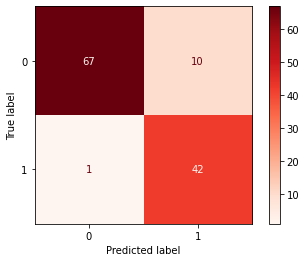

In [32]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_final, y_test, cmap='Reds'))

In [33]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train),
    'train - recall' : recall_score(y_train, y_pred_train),
    'train - accuracy' : accuracy_score(y_train, y_pred_train),
    'train - f1_score' : f1_score(y_train, y_pred_train),
    'test - precision' : precision_score(y_test, y_pred_test),
    'test - recall' : recall_score(y_test, y_pred_test),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
    'test - f1_score' : f1_score(y_test, y_pred_test),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Manual Search,Random Search,Grid Search
train - precision,0.990099,0.990099,0.990099,0.990099
train - recall,1.000000,1.000000,1.000000,1.000000
train - accuracy,0.996429,0.996429,0.996429,0.996429
train - f1_score,0.995025,0.995025,0.995025,0.995025
test - precision,0.816327,0.816327,0.807692,0.807692
test - recall,0.930233,0.930233,0.976744,0.976744
test - accuracy_score,0.900000,0.900000,0.908333,0.908333
test - f1_score,0.869565,0.869565,0.884211,0.884211


Even though `RandomSearchCV` and `GridSearchCV` produce same performance, but the best hyperparameter is different.

From `RandomSearchCV` : 
```
'n_estimators': 600,
'min_samples_split': 10,
'min_samples_leaf': 8,
'max_features': 'log2',
'max_depth': 450,
'criterion': 'gini'
```

From `GridSearchCV` : 
```
'criterion': 'gini',
'max_depth': 450,
'max_features': 'log2',
'min_samples_leaf': 8,
'min_samples_split': 8,
'n_estimators': 400
```